In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'


t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv')
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size
0,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,web,1,74.0,0.0,127.0,1.697895e+08,...,b'\x99w[\xb8\xe1\x9e\xbaz\x01\x06\x9c\xdc\x03\...,b'\xdb\xfc\xdfBY`$\x97\xf9\xaaGn\x98\xe0{RQ\x9...,0.529218,Android,0,0.366238,2020-10-19 23:36:30,23,Monday,0
1,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,74.0,0.0,127.0,3.589877e+08,...,b'>\x1a\x00W\xb0\x81\x06\x00\x90\xc8\x8aL\xb4\...,b'\xe9\xcd\x80\xb5\x96\xcf8\x8eo(p-\x0f\xf4\xf...,0.269752,Desktop,0,0.025551,2020-10-19 23:37:20,23,Monday,0
2,2020-10-19,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...","b'\xbe\xa0?\xc2</,\xa4&w\x86\xe9\x150Y\xd4\xdf...",6,web,1,4.0,2.0,10.0,-1.859395e+09,...,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,0.095993,Android,0,0.289000,2020-10-19 23:39:40,23,Monday,96000
3,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,73.0,1.0,127.0,-8.462803e+08,...,b'\xf2\x93e\xae\xadBh\x9f<<\x9e\xf0\x91q\xba\x...,"b'\x83u\xce\x10n\x9f\x10hP\x0cI\xdb \xed\xa8,E...",0.269752,iPhone,0,0.243945,2020-10-19 23:40:40,23,Monday,4
4,2020-10-19,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xa0\t^\xa5Z\x06[-\x86\x13\xd8\x08\x98\x8de\...,8,app_ios,2,74.0,0.0,127.0,NaN,...,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,0.136416,iPhone,0,0.647304,2020-10-19 23:26:10,23,Monday,0


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

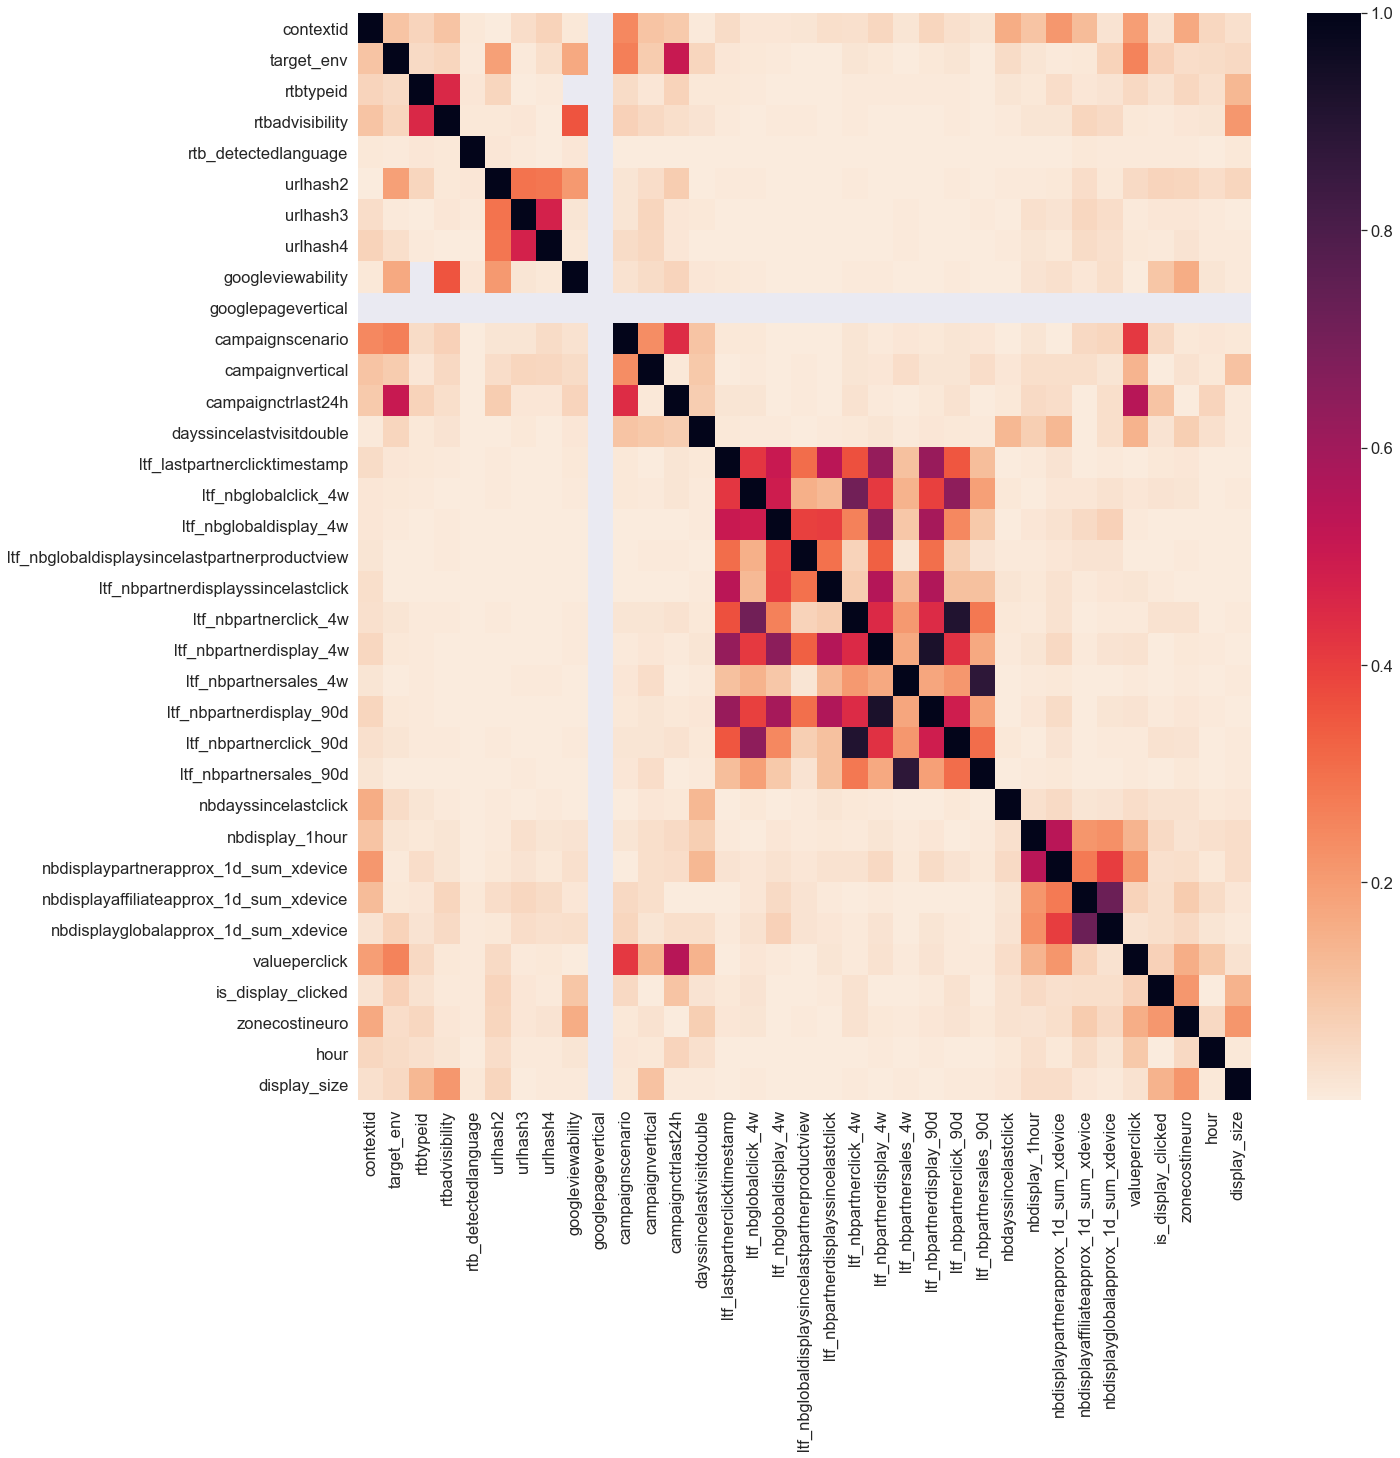

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

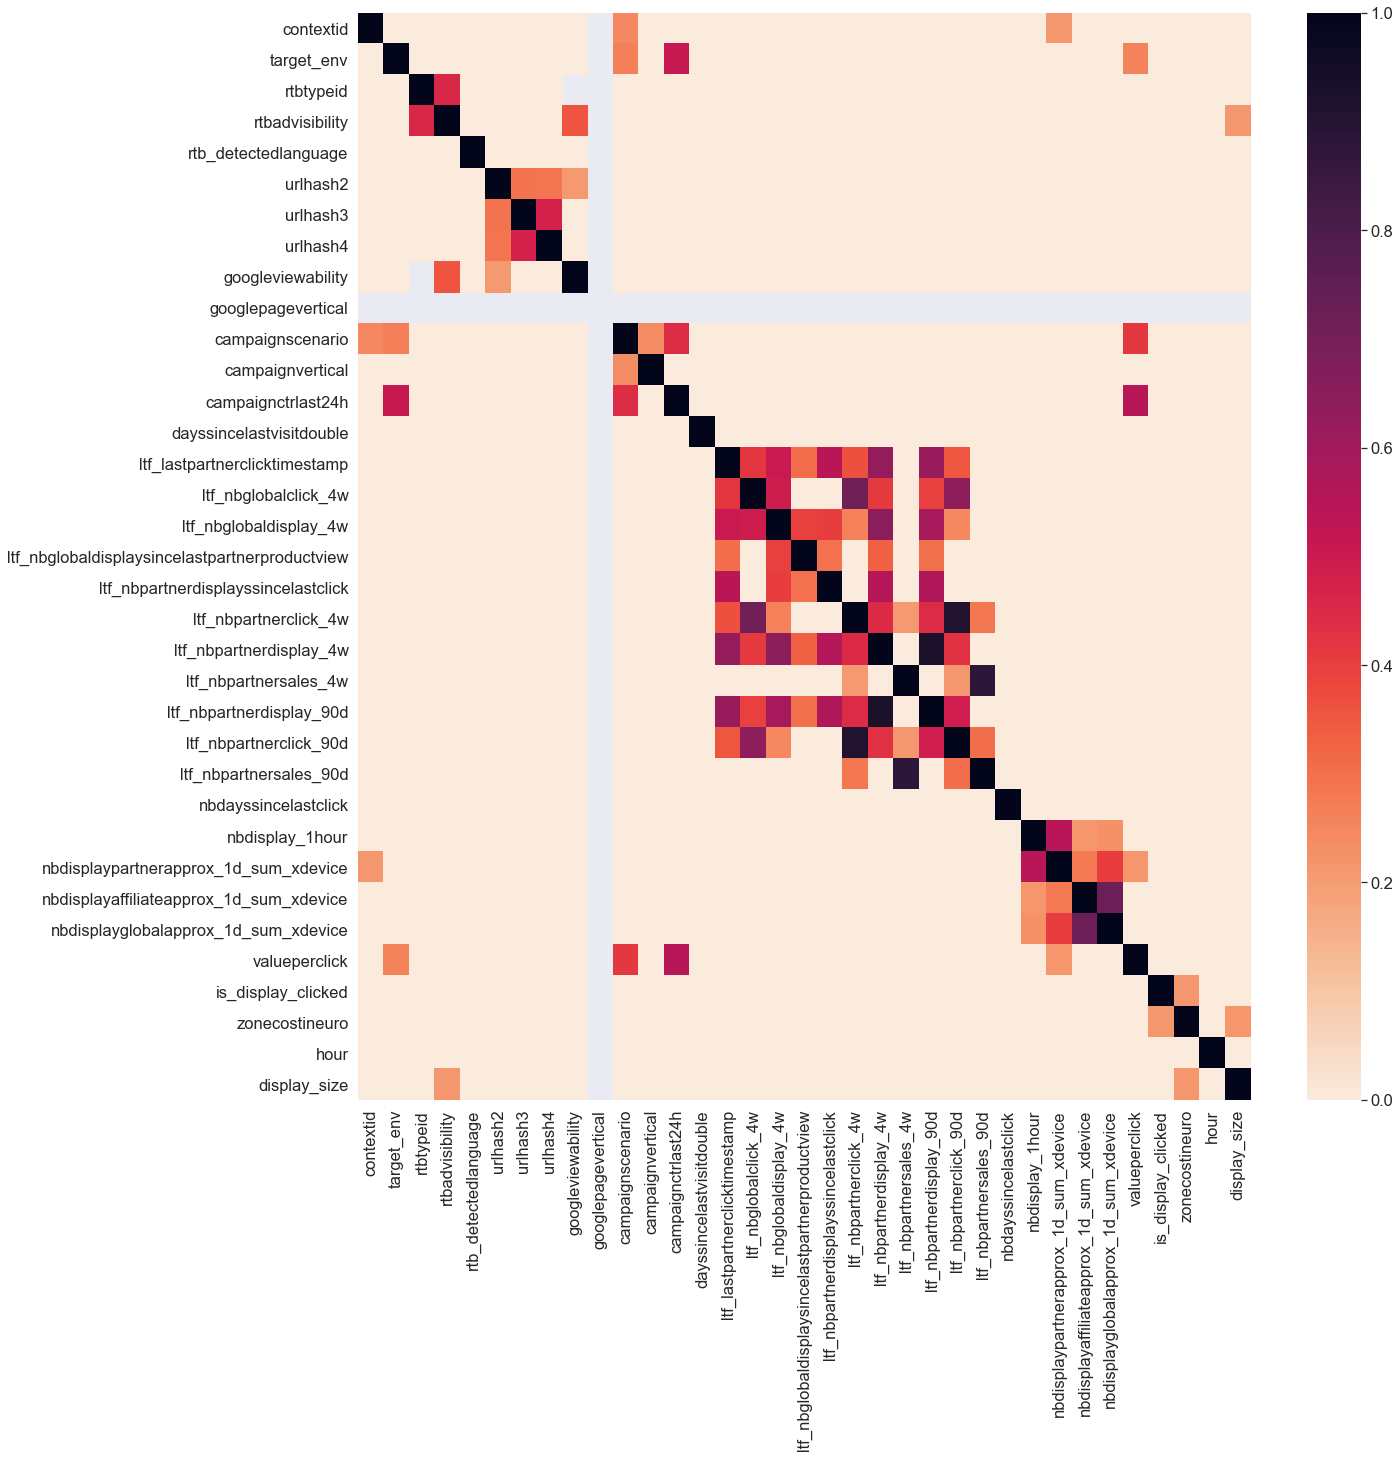

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.2 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Ratios nombre de clics / nombre de non clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(variable):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = pd.Series([0 for _ in range(len(df))])
    var_min = df[variable].min()
    var_max = df[variable].max()
    for i in range(len(df)):
        if var_min <= df[variable][i] < var_max/10:
            discrete_var[i] = 1
        elif var_max/10 <= df[variable][i] < 2*var_max/10:
            discrete_var[i] = 2
        elif 2*var_max/10 <= df[variable][i] < 3*var_max/10:
            discrete_var[i] = 3
        elif 3*var_max/10 <= df[variable][i] < 4*var_max/10:
            discrete_var[i] = 4
        elif 4*var_max/10 <= df[variable][i] < 5*var_max/10:
            discrete_var[i] = 5
        elif 5*var_max/10 <= df[variable][i] < 6*var_max/10:
            discrete_var[i] = 6
        elif 6*var_max/10 <= df[variable][i] < 7*var_max/10:
            discrete_var[i] = 7
        elif 7*var_max/10 <= df[variable][i] < 8*var_max/10:
            discrete_var[i] = 8
        elif 8*var_max/10 <= df[variable][i] < 9*var_max/10:
            discrete_var[i] = 9
        else:
            discrete_var[i] = 10
    return discrete_var

In [7]:
def ratio_plot(variable):
    """
    Trace le ratio nb de clics/nb de non clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
    ratio = clicked / notclicked
    fig, ax = plt.subplots(figsize=(10,8))
    ratio.plot(ax=ax)
    plt.xticks(rotation=0)
    ax.set_title(f"Ratio nombre de clics/nombre de non clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/nb de non clics')
    plt.show()

In [8]:
def stacked_barplot(column):
    clicked = df[df['is_display_clicked'] == 1].groupby(column).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(column).count()['is_display_clicked']
    total = df.groupby('contextid').count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    fig, ax = plt.subplots(figsize=(10,8))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(column)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()

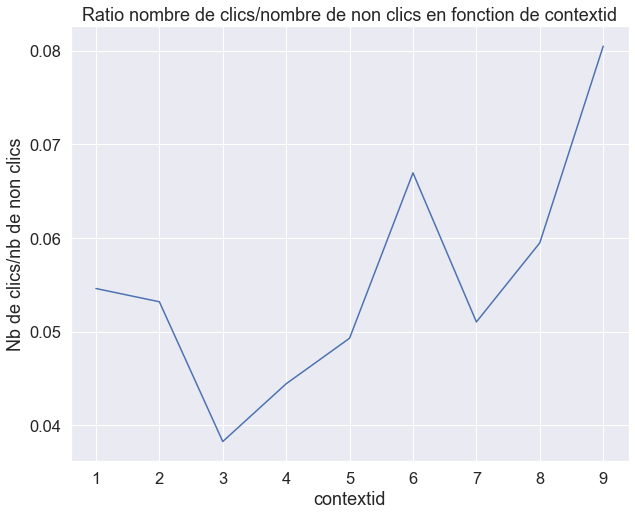

In [9]:
ratio_plot("contextid")

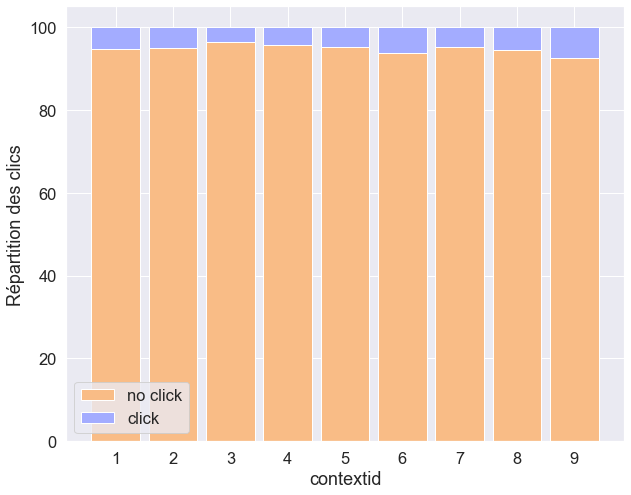

In [10]:
stacked_barplot('contextid')

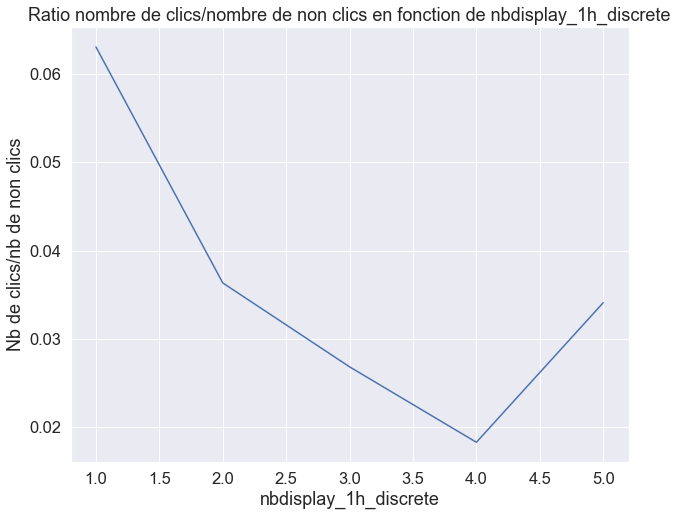

In [11]:
df["nbdisplay_1h_discrete"] = to_discrete("nbdisplay_1hour")
ratio_plot("nbdisplay_1h_discrete")

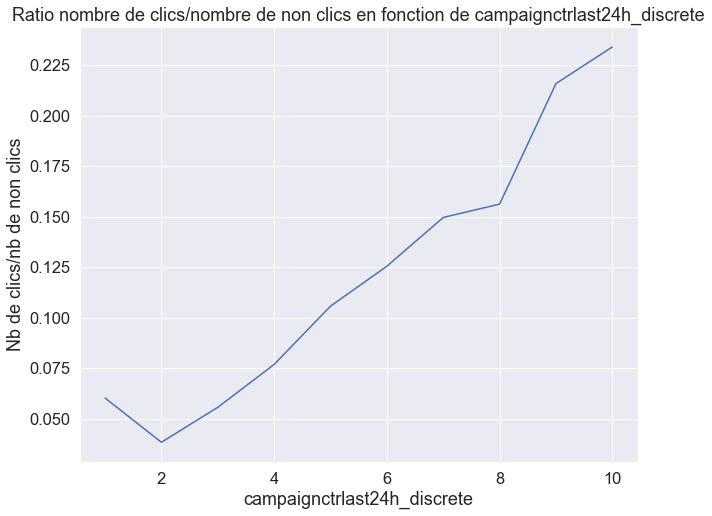

In [12]:
df["campaignctrlast24h_discrete"] = to_discrete("campaignctrlast24h")
ratio_plot("campaignctrlast24h_discrete")

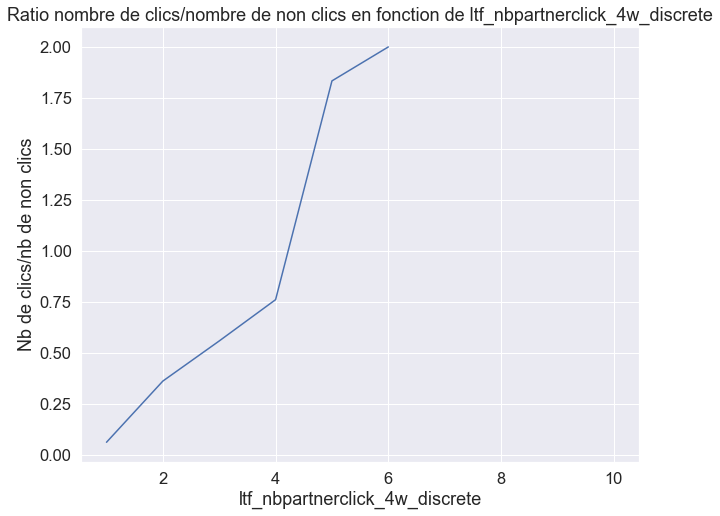

In [13]:
df["ltf_nbpartnerclick_4w_discrete"] = to_discrete("ltf_nbpartnerclick_4w")
ratio_plot("ltf_nbpartnerclick_4w_discrete")

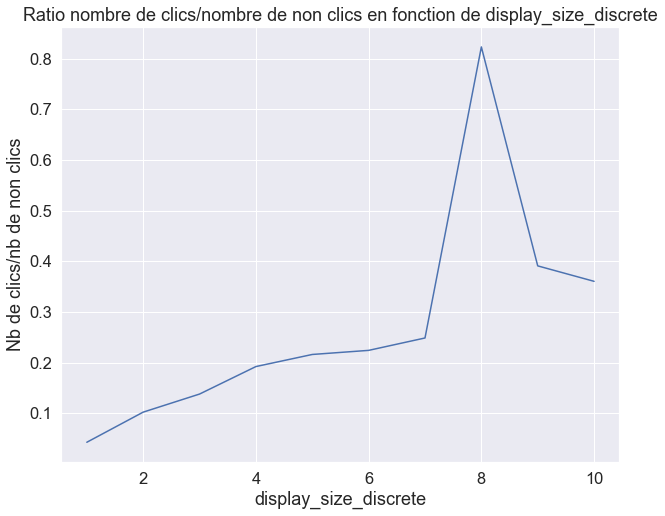

In [14]:
df["display_size_discrete"] = to_discrete("display_size")
ratio_plot("display_size_discrete")

In [15]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

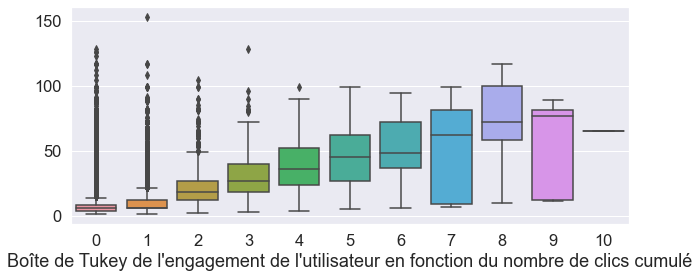

In [16]:
ax = plt.subplots(figsize=(10,4))
sns.set_style("whitegrid")
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax[1])
ax[1].set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax[1].set_ylabel('')
plt.show()

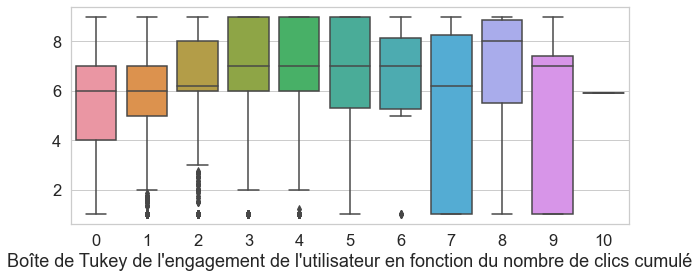

In [17]:
ax = plt.subplots(figsize=(10,4))
sns.set_style("whitegrid")
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax[1])
ax[1].set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax[1].set_ylabel('')
plt.show()

# Bots

Calcul du nombre de clics par utilisateurs

In [18]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_uid,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0


In [19]:
# `hashed_uid` : Hashed identification number of the Web user
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']
d

,is_display_clicked,contextid,user_apperances,contextid_weighted
hashed_uid,,,,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10,65,11,5.909091
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9,77,11,7.000000
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9,81,9,9.000000
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9,11,11,1.000000
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9,12,12,1.000000
...,...,...,...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0,8,1,8.000000
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0,8,1,8.000000
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0,16,2,8.000000


In [20]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\xc4\xc8\xb7\xb0\x7faU\x01D5\xfe\x96\xb7\x165\xff\x90\xc2\xcd;\xbf^\\\x10\xf9z*\x0e\xc6%4v',9
b'\xadk\x10\x99k\\\x7f\xef\xf3\x86\xe6f\\{)\xd8\x14t\x8b\x8b\x16\x7f\xb0z)\xd4\n\xe7&dN\xe9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
b'\x05\xa3\x85\xf7TeZ\x98\xcc&\x15\xdc\xbaY\x85\xe8\xf3\xce\xd2I\xc8R:;-\x1f\xb9\xb9\x9e\xef\x89\x95',0
"b'\x05\xa3\x99\xafx4\x96,G\xca\x03I\x97C|\xe7~\xad\x1d\x80M\x96[\xf0\xbd\x886\x96\x1c\xb8\x9c\xa9'",0
b'\x05\xa3\xaa?\xa0W\xf5\xc2\xf4\xcev~X\xe6\xfc\xb3%\xc8?;T\xff\xc1\x02\xf5\\k\xcb2N[\n',0


## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

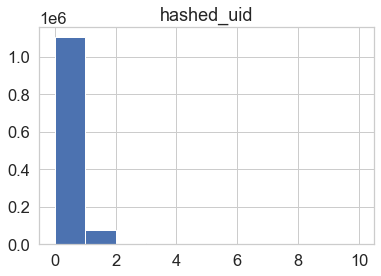

In [21]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

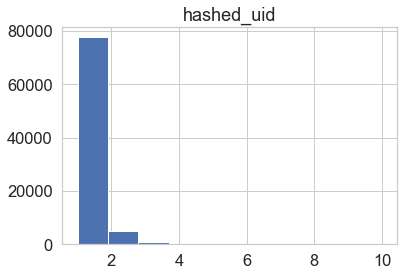

In [22]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

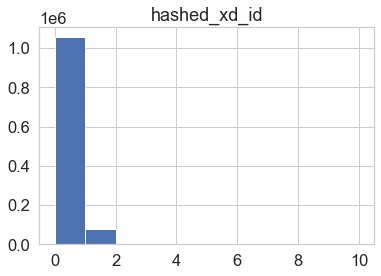

In [23]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

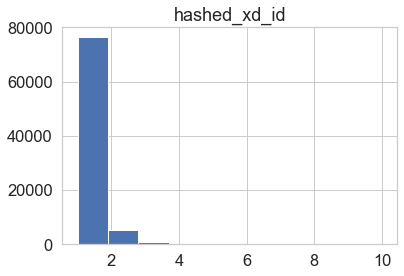

In [24]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Valeurs nan dans les clics

Proportion des valeurs nan pour chaque variable parmi les publicités cliquées

In [25]:
c = df.loc[df['is_display_clicked']==1]
c.isnull().sum(axis = 0)/len(c)

day                                               0.000000
hashed_partner_id                                 0.000000
hashed_campaign_id                                0.000000
contextid                                         0.000000
display_env                                       0.000000
target_env                                        0.000000
rtbtypeid                                         0.002975
rtbadvisibility                                   0.002975
rtb_detectedlanguage                              0.002975
urlhash2                                          0.094472
urlhash3                                          0.094472
urlhash4                                          0.094472
user_country                                      0.000174
hashed_affiliateid                                0.000000
hashed_app_id                                     0.324941
googleviewability                                 0.618809
googlepagevertical                                0.0029

## Timestamp

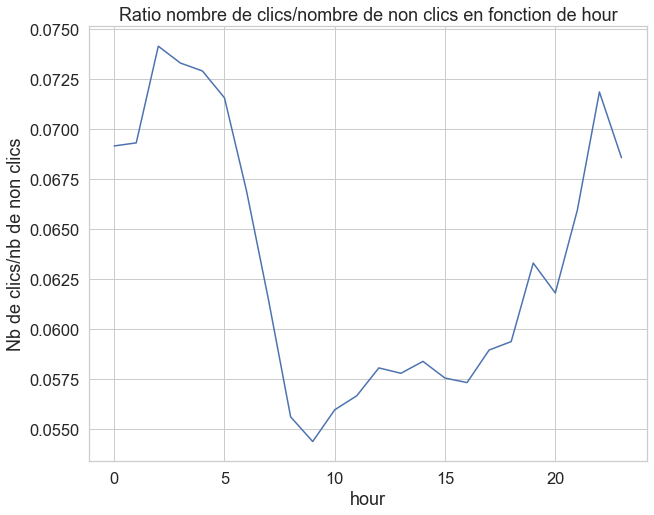

In [26]:
ratio_plot("hour")

In [27]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size,nbdisplay_1h_discrete,campaignctrlast24h_discrete,ltf_nbpartnerclick_4w_discrete,display_size_discrete
0,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,web,1,74.0,0.0,127.0,1.697895e+08,...,0,0.366238,2020-10-19 23:36:30,23,Monday,0,1,2,1,1
1,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,1,web,1,74.0,0.0,127.0,3.589877e+08,...,0,0.025551,2020-10-19 23:37:20,23,Monday,0,1,3,1,1
2,2020-10-19,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...","b'\xbe\xa0?\xc2</,\xa4&w\x86\xe9\x150Y\xd4\xdf...",6,web,1,4.0,2.0,10.0,-1.859395e+09,...,0,0.289000,2020-10-19 23:39:40,23,Monday,96000,1,6,1,1
3,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,73.0,1.0,127.0,-8.462803e+08,...,0,0.243945,2020-10-19 23:40:40,23,Monday,4,2,1,1,1
4,2020-10-19,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xa0\t^\xa5Z\x06[-\x86\x13\xd8\x08\x98\x8de\...,8,app_ios,2,74.0,0.0,127.0,NaN,...,0,0.647304,2020-10-19 23:26:10,23,Monday,0,1,7,1,1


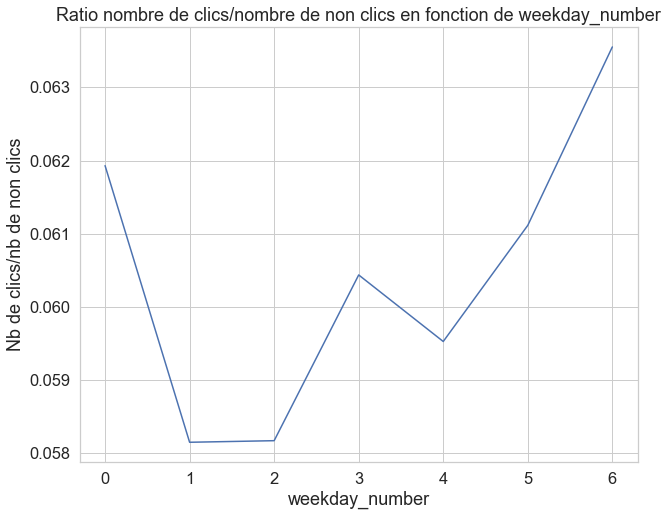

In [28]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

In [29]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:03:31
